In [1]:
import os
import json
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
import shutil

# Ruta de la carpeta principal (puedes cambiarla según tu estructura)
main_folder = '/content/Dataset_coco_last'

# Crea la carpeta principal
os.makedirs(main_folder, exist_ok=True)

# Rutas de las carpetas train y test
train_folder = os.path.join(main_folder, 'train')
test_folder = os.path.join(main_folder, 'test')

# Crea las carpetas train y test
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Rutas de las carpetas de imágenes y máscaras
images_train_folder = os.path.join(train_folder, 'images')
masks_train_folder = os.path.join(train_folder, 'mask')

images_test_folder = os.path.join(test_folder, 'images')
masks_test_folder = os.path.join(test_folder, 'mask')

# Crea las carpetas de imágenes y máscaras
os.makedirs(images_train_folder, exist_ok=True)
os.makedirs(masks_train_folder, exist_ok=True)
os.makedirs(images_test_folder, exist_ok=True)
os.makedirs(masks_test_folder, exist_ok=True)




In [5]:
from PIL import Image, ImageDraw
import os

def get_mask(ruta, imagenes, annotations, save_in):
    for img in imagenes:
        imagen = Image.open(os.path.join(ruta, img['file_name']))
        anns = [a for a in annotations if a['image_id'] == img['id']]
        mask = Image.new('L', imagen.size, 0)
        draw = ImageDraw.Draw(mask)
        for ann in anns:
            segmentation = ann['segmentation'][0]
            draw.polygon(segmentation, outline=ann['category_id'], fill=ann['category_id'])
        mask.save(os.path.join(save_in, "mask", f"{img['file_name'][:-4]}.png"))


In [7]:
'''Se crea la carpeta Dataset/train,test/images,mask'''


ruta = '/content/Second_Exam_AI_beans-1/test/'
save_in = '/content/Dataset_coco_last/test/'

annotations_coco = json.load(open(f'{ruta}_annotations.coco.json','r'))
imagenes = annotations_coco['images']
annotations = annotations_coco['annotations']
get_mask(ruta, imagenes, annotations, save_in)


In [ ]:
annotations_coco.keys()

In [8]:
ruta = '/content/Second_Exam_AI_beans-1/train/'
save_in = '/content/Dataset_coco_last/train/'
annotations_coco = json.load(open(f'{ruta}_annotations.coco.json','r'))
imagenes = annotations_coco['images']
annotations = annotations_coco['annotations']
get_mask(ruta, imagenes, annotations, save_in)

In [10]:
import shutil
import os
from PIL import Image

# Rutas de las carpetas de origen y destino
carpeta_origen = '/content/Second_Exam_AI_beans-1/train/'
carpeta_destino = "/content/Dataset_coco_last/train/images"

# Verifica si la carpeta de destino existe, si no, créala
if not os.path.exists(carpeta_destino):
    os.makedirs(carpeta_destino)

# Lista de archivos en la carpeta de origen
archivos_a_transferir = os.listdir(carpeta_origen)

# Filtra solo los archivos de imagen
archivos_imagenes = [archivo for archivo in archivos_a_transferir if archivo.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Itera sobre los archivos de imagen y transfierelos a la carpeta de destino
for archivo in archivos_imagenes:
    ruta_origen = os.path.join(carpeta_origen, archivo)
    ruta_destino = os.path.join(carpeta_destino, archivo)
    shutil.move(ruta_origen, ruta_destino)

print("Transferencia completada.")



Transferencia completada.


In [11]:
import shutil
import os
from PIL import Image

# Rutas de las carpetas de origen y destino
carpeta_origen = '/content/Second_Exam_AI_beans-1/test/'
carpeta_destino = "/content/Dataset_coco_last/test/images"

# Verifica si la carpeta de destino existe, si no, créala
if not os.path.exists(carpeta_destino):
    os.makedirs(carpeta_destino)

# Lista de archivos en la carpeta de origen
archivos_a_transferir = os.listdir(carpeta_origen)

# Filtra solo los archivos de imagen
archivos_imagenes = [archivo for archivo in archivos_a_transferir if archivo.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Itera sobre los archivos de imagen y transfierelos a la carpeta de destino
for archivo in archivos_imagenes:
    ruta_origen = os.path.join(carpeta_origen, archivo)
    ruta_destino = os.path.join(carpeta_destino, archivo)
    shutil.move(ruta_origen, ruta_destino)

print("Transferencia completada.")



Transferencia completada.


In [13]:
images= [Image.open(f"/content/Dataset_coco_last/test/images/{i}") for i in os.listdir("/content/Dataset_coco_last/test/images")]

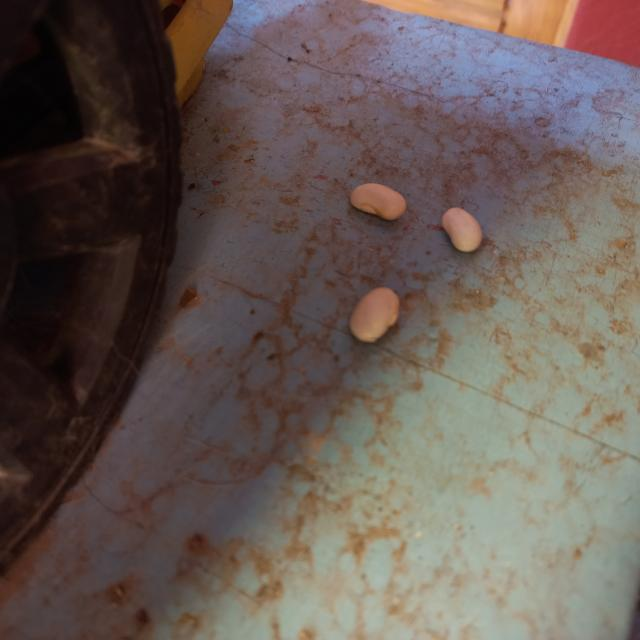

In [14]:
images[0]

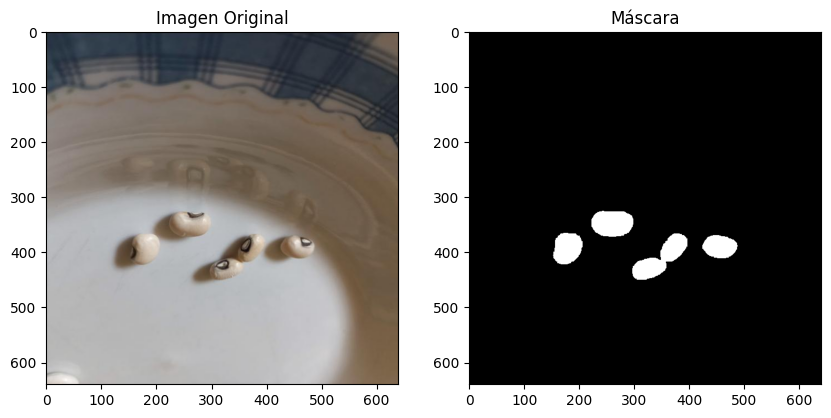

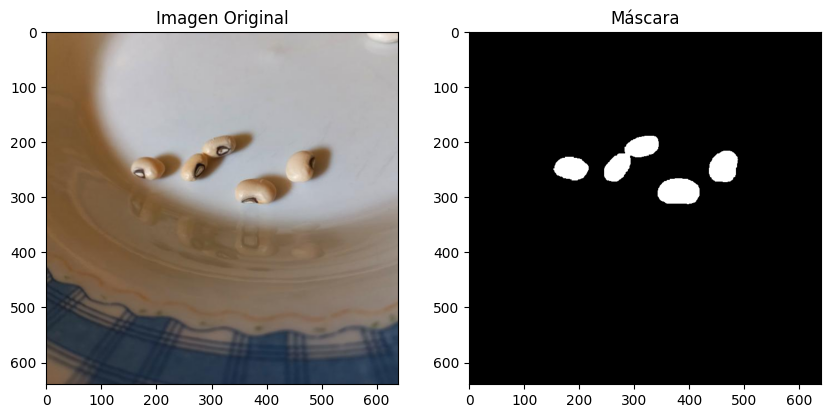

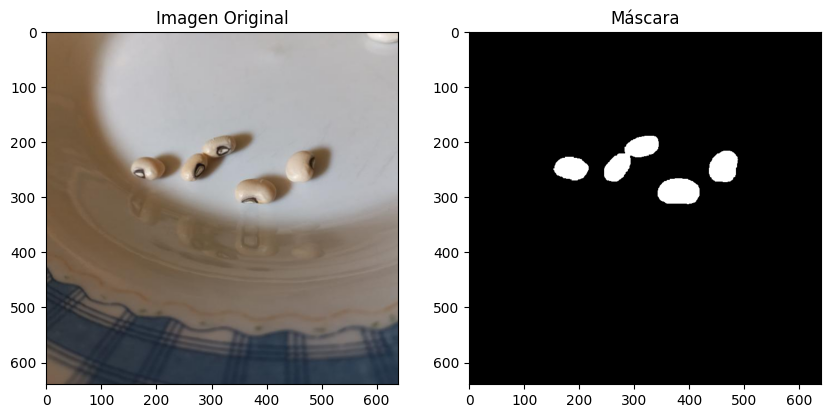

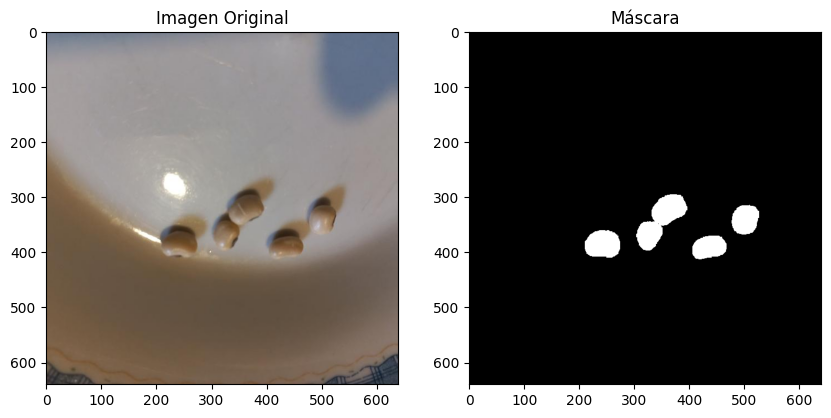

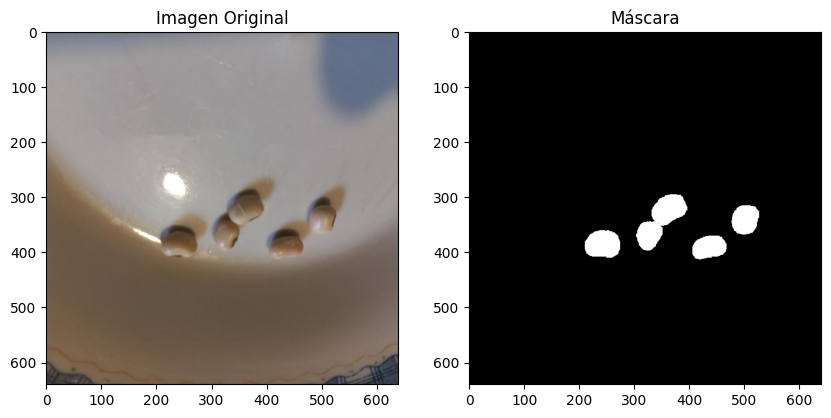

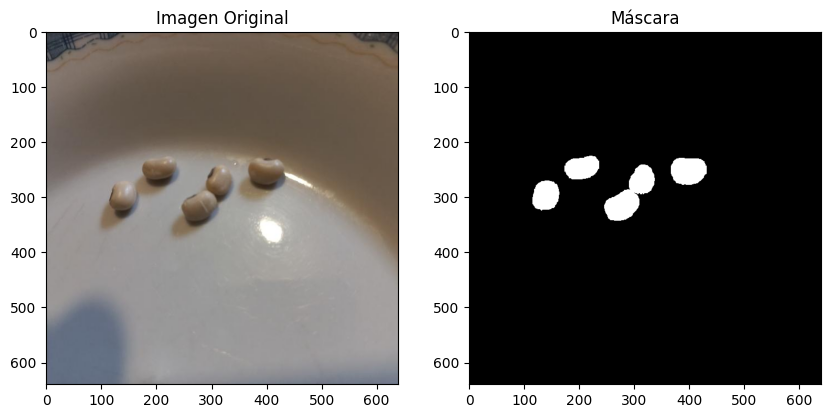

KeyboardInterrupt: ignored

In [16]:
from PIL import Image
import os
import matplotlib.pyplot as plt

def show_images_side_by_side(image_folder, mask_folder):
    # Obtén la lista de archivos en ambas carpetas
    image_files = os.listdir(image_folder)
    mask_files = os.listdir(mask_folder)

    # Ordena la lista para asegurar que coincidan las imágenes y las máscaras
    image_files.sort()
    mask_files.sort()
    count = 0
    # Itera sobre los archivos y muestra las imágenes lado a lado
    for image_file, mask_file in zip(image_files, mask_files):
        image_path = os.path.join(image_folder, image_file)
        mask_path = os.path.join(mask_folder, mask_file)

        # Abre las imágenes
        image = Image.open(image_path)
        mask = Image.open(mask_path)

        # Crea una figura y muestra las imágenes lado a lado
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        # Imagen original
        axes[0].imshow(image)
        axes[0].set_title('Imagen Original')

        # Máscara
        axes[1].imshow(mask, cmap='gray')
        axes[1].set_title('Máscara')
        if count == 3:
          break;
        count=+ 1
        plt.show()

# Rutas de las carpetas de imágenes y máscaras
carpeta_imagenes = "/content/Dataset_coco_last/train/images"
carpeta_masks = "/content/Dataset_coco_last/train/mask"

# Llamada a la función para mostrar imágenes y máscaras lado a lado
show_images_side_by_side(carpeta_imagenes, carpeta_masks)

In [19]:
import shutil
from google.colab import files

def zip_and_download(folder_path, zip_filename, destination_path):
    # Comprime la carpeta en un archivo zip
    shutil.make_archive(zip_filename, 'zip', folder_path)

    # Mueve el archivo zip a la carpeta de destino
    shutil.move(f"{zip_filename}.zip", f"{destination_path}/{zip_filename}.zip")

    # Descarga el archivo zip
    files.download(f"{destination_path}/{zip_filename}.zip")

# Ruta de la carpeta que deseas comprimir
carpeta_a_comprimir = "/content/Dataset_coco_last"

# Nombre del archivo zip resultante
nombre_archivo_zip = "/Dataset_coco_last_beans"

# Ruta de destino para el archivo zip
ruta_destino_zip = "/content/drive/MyDrive/IA_II/Segmentation/Uninet/dataset"

# Llamada a la función para comprimir y descargar
zip_and_download(carpeta_a_comprimir, nombre_archivo_zip, ruta_destino_zip)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>